### Task 1 - Supervised ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame([[2.5,21],[5.1,27],[3.2,27],[8.5,75],[3.5,30],[1.5,20],[9.2,88],[5.5,60],
        [8.3,81],[2.7,25],[7.7,85],[5.9,62],[4.5,41],[3.3,42],
        [1.1,17],[8.9,95],[2.5,30],[1.9,24],[6.1,67],[7.4,69],
        [2.7,30],[4.8,54],[3.8,35],[6.9,76],[7.8,86]],columns=['Hours','Scores'])

In [3]:
df.to_csv("Hours_vs_Scores.csv",index=False)

### Now reading the csv file

In [4]:
df1 = pd.read_csv("Hours_vs_Scores.csv")
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,27
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,50.680000
std,2.525094,25.746715
min,1.100000,17.000000
25%,2.700000,27.000000
50%,4.800000,42.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
### Let us check for missing values
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

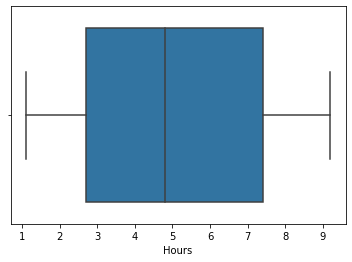

In [8]:
### Let us check for outliers
sns.boxplot(x = df1['Hours'])
plt.show()

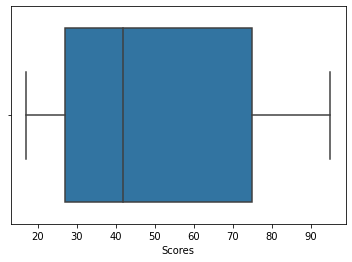

In [9]:
sns.boxplot(x = df["Scores"])
plt.show()

There are no outliers nor missing values

In [10]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:,:-1]
Y = df1.iloc[:,1]

In [11]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
Y.head()

0    21
1    27
2    27
3    75
4    30
Name: Scores, dtype: int64

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, Y_pred)

In [18]:
print("The r2 score is: ", score)

The r2 score is:  0.9476931606118677


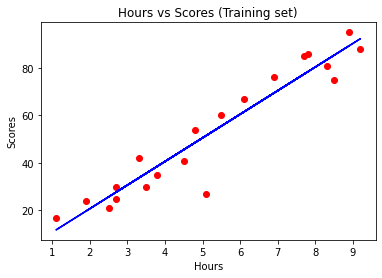

In [19]:
### Let us plot the best fit line

plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [20]:
model.predict([[9.25]])

array([92.78259744])

### As we can see the score of a student if he studies for 9.25 hr per day is 92.78 approx 93.

### Let us save the model

In [21]:
import pickle as pkl

pkl.dump(model,open("model.pkl","wb"))